<a href="https://colab.research.google.com/github/SUSHWANTH1567/adm-lab/blob/main/ass%201%201567.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Dataset:
   Employee_ID   Age    Salary  Job_Satisfaction  Work_Hours_Per_Week
0         1001  50.0  108953.0               9.0                   36
1         1002  36.0   82995.0               8.0                   59
2         1003  29.0   70757.0               2.0                   30
3         1004  42.0   39692.0               1.0                   30
4         1005  40.0   75758.0               7.0                   54

Preprocessed Dataset:
   Employee_ID   Age    Salary  Job_Satisfaction  Work_Hours_Per_Week  \
0         1001  50.0  108953.0               9.0                   36   
1         1002  36.0   82995.0               8.0                   59   
2         1003  29.0   70757.0               2.0                   30   
3         1004  42.0   39692.0               1.0                   30   
4         1005  40.0   75758.0               7.0                   54   

   Age_Scaled  Salary_Scaled  Age_Manual_Scaled  Salary_Manual_Scaled  \
0    0.750000       0.87770

<ipython-input-2-159dc51667c7>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-2-159dc51667c7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

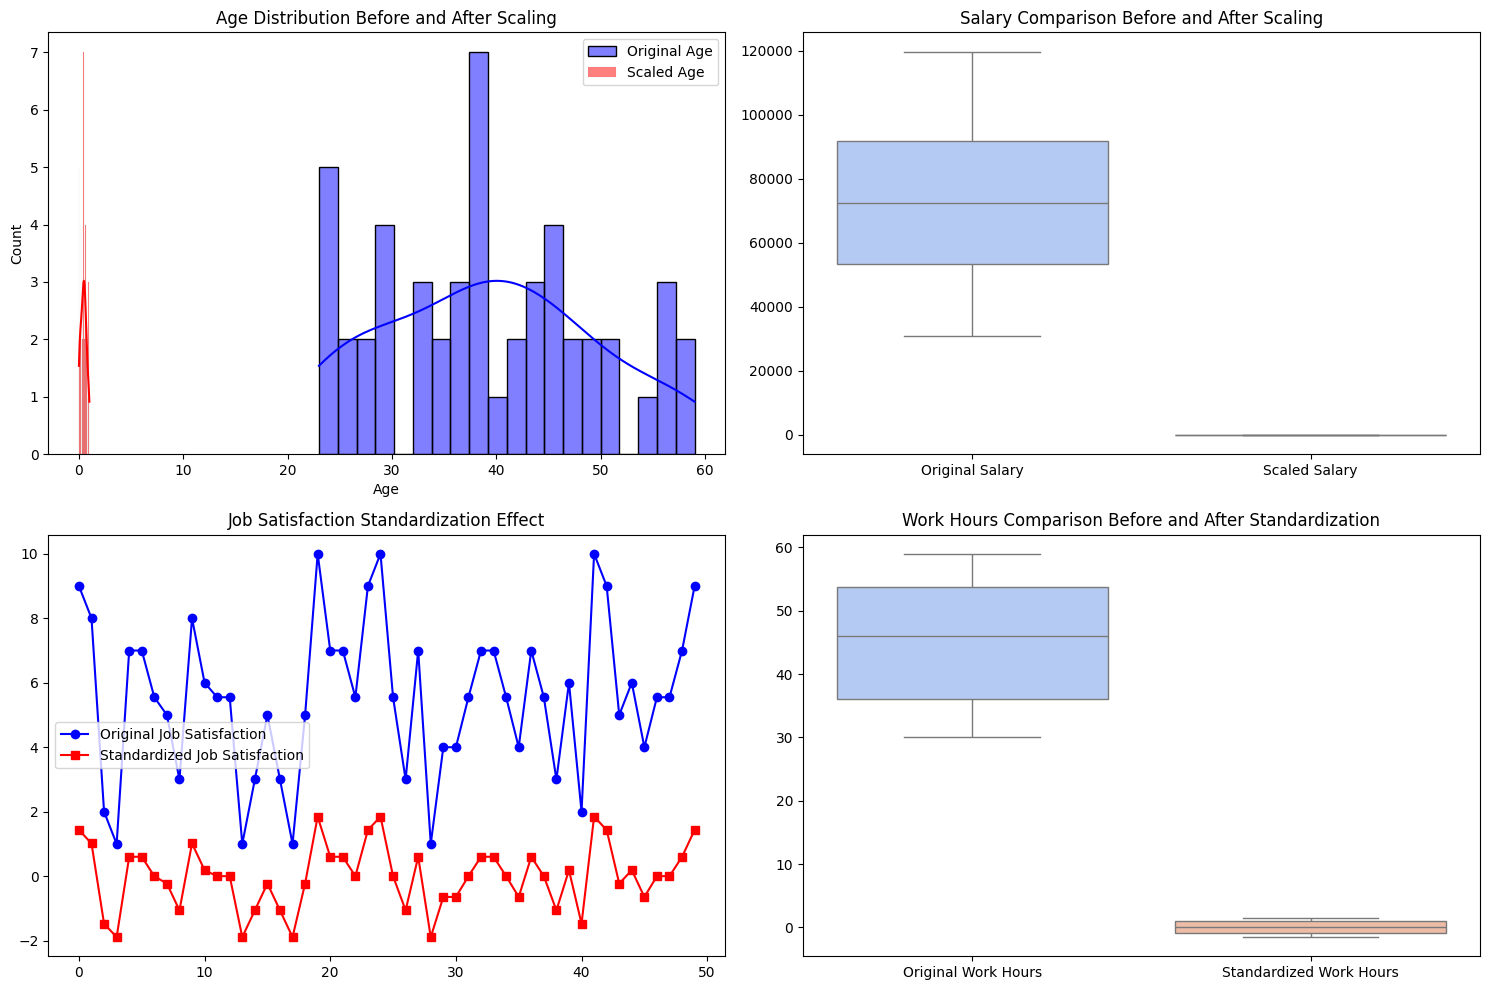

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv("/content/employee_data.csv")

# Display the first few rows before preprocessing
print("Original Dataset:")
print(df.head())

# Handling missing values using mean imputation
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
df['Job_Satisfaction'].fillna(df['Job_Satisfaction'].mean(), inplace=True)

# Min-Max Scaling for Age and Salary
min_max_scaler = MinMaxScaler()
df[['Age_Scaled', 'Salary_Scaled']] = min_max_scaler.fit_transform(df[['Age', 'Salary']])

# Manual Min-Max Scaling
df['Age_Manual_Scaled'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Salary_Manual_Scaled'] = (df['Salary'] - df['Salary'].min()) / (df['Salary'].max() - df['Salary'].min())

# Standardization (Z-score normalization) for Job Satisfaction and Work Hours Per Week
standard_scaler = StandardScaler()
df[['Job_Satisfaction_Standardized', 'Work_Hours_Standardized']] = standard_scaler.fit_transform(df[['Job_Satisfaction', 'Work_Hours_Per_Week']])

# Manual Z-score normalization
df['Job_Satisfaction_Manual_Standardized'] = (df['Job_Satisfaction'] - df['Job_Satisfaction'].mean()) / df['Job_Satisfaction'].std()
df['Work_Hours_Manual_Standardized'] = (df['Work_Hours_Per_Week'] - df['Work_Hours_Per_Week'].mean()) / df['Work_Hours_Per_Week'].std()

# Display the dataset after preprocessing
print("\nPreprocessed Dataset:")
print(df.head())

# Save the preprocessed dataset to a new CSV file
df.to_csv("preprocessed_employee_data.csv", index=False)

# --- Visualization ---

# Set up the figure
plt.figure(figsize=(15, 10))

# Histogram - Age before and after scaling
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='blue', label='Original Age')
sns.histplot(df['Age_Scaled'], bins=20, kde=True, color='red', label='Scaled Age')
plt.title("Age Distribution Before and After Scaling")
plt.legend()

# Boxplot - Salary before and after scaling
plt.subplot(2, 2, 2)
sns.boxplot(data=df[['Salary', 'Salary_Scaled']], palette="coolwarm")
plt.xticks([0, 1], ['Original Salary', 'Scaled Salary'])
plt.title("Salary Comparison Before and After Scaling")

# Line Plot - Job Satisfaction before and after standardization
plt.subplot(2, 2, 3)
plt.plot(df['Job_Satisfaction'], label='Original Job Satisfaction', marker='o', color='blue')
plt.plot(df['Job_Satisfaction_Standardized'], label='Standardized Job Satisfaction', marker='s', color='red')
plt.title("Job Satisfaction Standardization Effect")
plt.legend()

# Boxplot - Work Hours before and after standardization
plt.subplot(2, 2, 4)
sns.boxplot(data=df[['Work_Hours_Per_Week', 'Work_Hours_Standardized']], palette="coolwarm")
plt.xticks([0, 1], ['Original Work Hours', 'Standardized Work Hours'])
plt.title("Work Hours Comparison Before and After Standardization")

plt.tight_layout()
plt.show()
